# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим данные.

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Данные выглядят корректно. Запрос №1 содержит модель самолёта и количество рейсов для каждой модели самолетов в сентябре 2018 года. А запрос №3 содержит город и среднее количество рейсов, прибывающих в город за день в сентябре 2018 года.

Посмотрим общую информацию о каждой таблице.

In [5]:
query_1.info()
print()
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропущенных значений нет. Названия имеют тип object, количество - integer, среднее количество рейсов - float.

Проверим таблицу 3 на дубликаты. Первая таблица их не содержит.

In [6]:
query_3.duplicated().sum()

0

Дубликатов нет. Рассмотрим статистическую информацию.

In [7]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Количество рейсов на разных моделях самолётов сильно отличается. Самая популярная модель: Cessna 208 Caravan - 4 557 рейсов. А модель, на которую приходится самое маленькое количество рейсов: Boeing 777-300 - всего 300 рейсов.

In [8]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Как и в запросе 1 в запросе 3 среднее количество рейсов, прибывающих в город, резко отличаются в зависимости от города - они колеблятся от 1 до 129. Наверняка самые популярные города - это Москва и Питер. Посмотрим.

In [9]:
query_3.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Так оно и есть: Москва и Питер - самые популярные города. Но Москва - безоговорочный лидер, всё-таки столица.

Далее построим графики.

## Модель самолёта и количество рейсов.

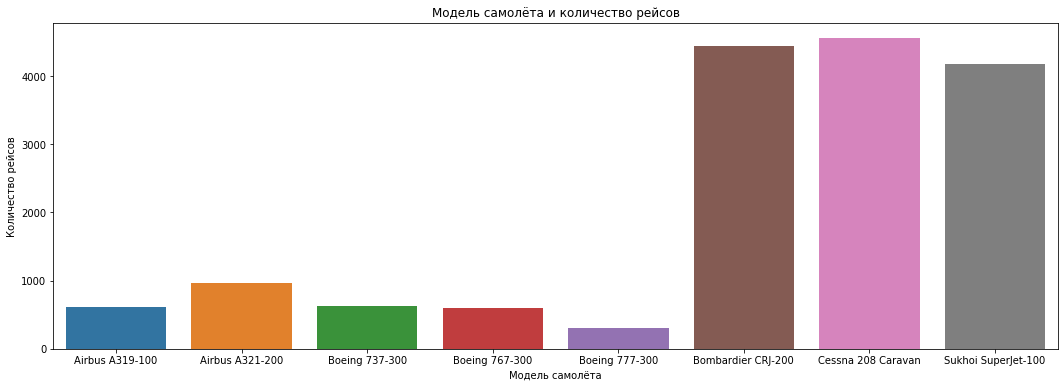

In [10]:
plt.figure(figsize=(18, 6))
sns.barplot(x='model', y='flights_amount', data=query_1)
plt.title('Модель самолёта и количество рейсов')
plt.xlabel('Модель самолёта')
plt.ylabel('Количество рейсов')
plt.show()

    Явно выделяется топ-3 популярных моделей самолётов. Cessna 208 Caravan - легкий самолёт, используется на авиалиниях малой протяжённости. Базовая модель перевозит девять пассажиров (до 13 пассажиров + 1 пилот по разрешению FAA). 
    CRJ200 имеют повышенные эксплуатационные характеристики: данный тип способен выполнять полёты в сложных метеорологических условиях и в условиях высокогорных аэродромов.Пятидесятиместный комфортабельный салон, оборудованный удобными кожаными креслами, благодаря имеющимся инженерно-техническим решениям, может легко быть переоборудован в полный эконом или бизнес/эконом класс.
    Sukhoi Superjet 100 — российский ближнемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.
    Среди Аэробусов А321-200 более популярный, возможно, из-за более вместительного салона, который вмещает до 220 пассажиров. При этом дальность полётов составляет до 3800 км. В то время как А319-100 может взять на борт до 156 пассажиров, а дальность - 4 700-6 800 км.
    Боинги менее популярны.

## Города и среднее количество рейсов

Построим график для топ-13 городов с количеством рейсов.

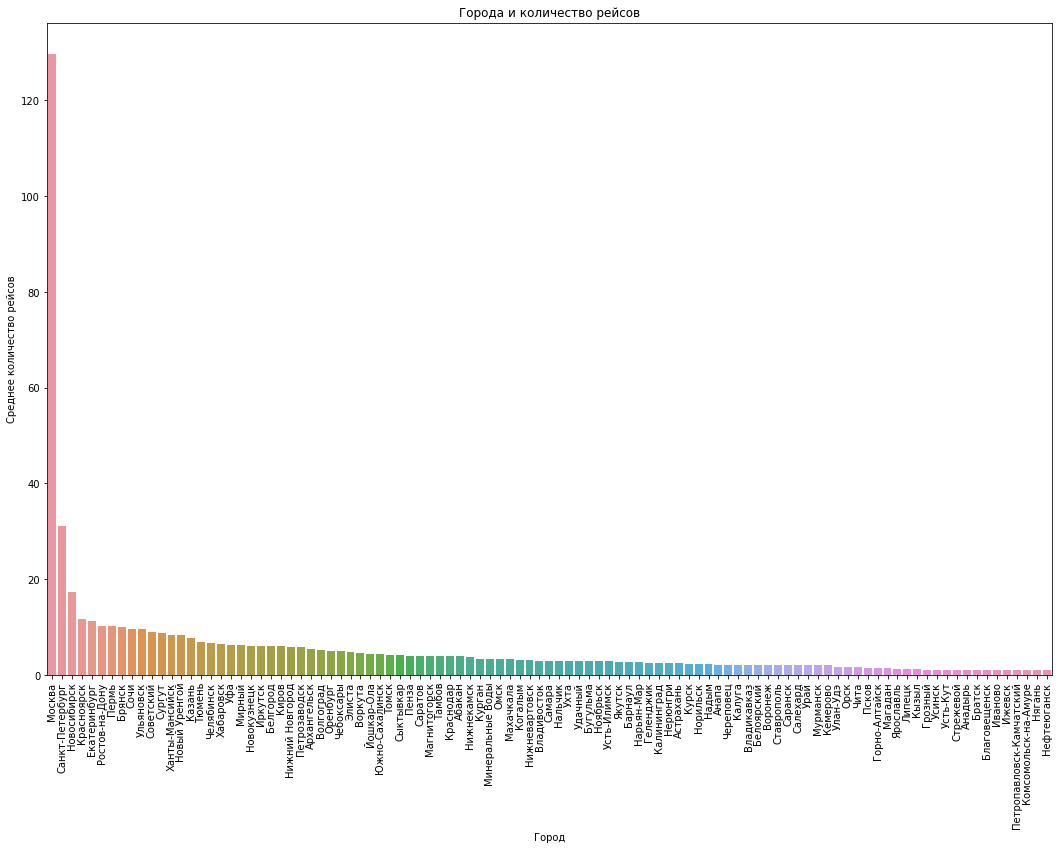

In [11]:
plt.figure(figsize=(18, 12))
sns.barplot(x='city', y='average_flights', data=query_3.sort_values(by='average_flights', ascending=False))
plt.title('Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов')
plt.xticks(rotation=90)
plt.show()

График очень объеиный и опять же выделяется Москва, по сравнению с остальными городами. Видно, что есть средние по популярности города, такие как Брянск, Екатеринбург, Казань, Ульяновск и малопосещаемые города - Иваново, Ижевск, Нягань, Орск. Всё таки удобнее смотреть данную информацию в табличном виде.

## Топ-10 городов и среднее количество рейсов

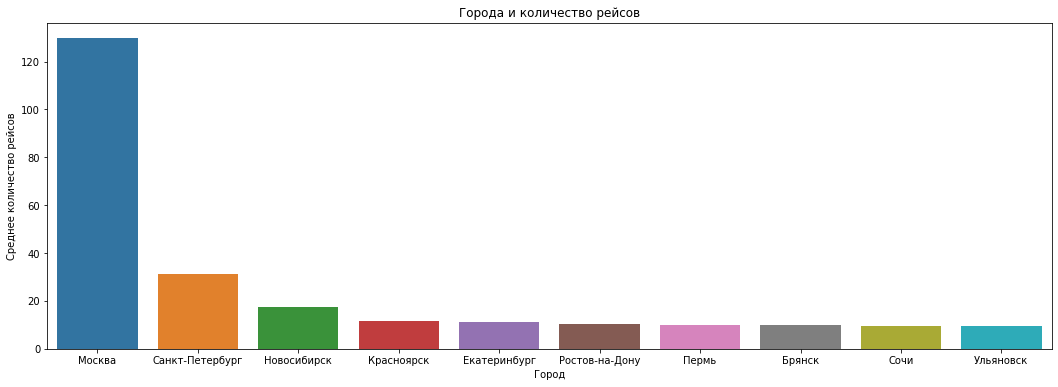

In [12]:
plt.figure(figsize=(18, 6))
sns.barplot(x='city', y='average_flights', data=query_3.sort_values(by='average_flights', 
                                                                    ascending=False).head(10))
plt.title('Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов')
plt.show()

Как уже было сказано ранее, Москва - безоговорочный лидер. Далее идет Санкт-петербург и Новосибирск, но до Москвы им очень далеко. Остальные города не так сильно отличаются друг от друга по среднему количеству рейсов.

## Вывод

Проведя анализ, мы выяснили, что данные готовы к обработке, числа хранятся как числа, текст как текст, дубликатов нет и пропущенных значений тоже. Самые популярные самолёты моделей: Cessna 208 Caravan, CRJ200 и Sukhoi Superjet 100. А топ-3 популярных по посещаемости городов - это Москва, Санкт-Петербург и Новосибирск.